# SUP ML 1 - PREPROCESSING

# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Importar train data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Nuclio/2º entregable/telecom_churn_TRAINTEST.csv")
df_predecir = pd.read_csv("/content/drive/MyDrive/Nuclio/2º entregable/Copia de telecom_churn_PREDICT.csv")

In [4]:
df_3 = pd.read_csv("/content/drive/MyDrive/Nuclio/2º entregable/Copia de variable_dictionary.csv")

# EDA: Analisis Exploratorio

In [5]:
import pandas as pd

def comparar_columnas(df, df2):
  """Compara las columnas de dos DataFrames y devuelve las diferencias.

  Args:
    df1: El primer DataFrame.
    df2: El segundo DataFrame.

  Returns:
    Un diccionario con las columnas que son diferentes y en qué DataFrame se encuentran.
  """

  columnas_df = set(df.columns)
  columnas_df_predecir = set(df_predecir.columns)

  diferencias = {
      "df": list(columnas_df - columnas_df_predecir),
      "df_predecir": list(columnas_df_predecir - columnas_df),
  }

  return diferencias



# Comparar las columnas de los DataFrames
diferencias = comparar_columnas(df, df_predecir)

# Imprimir las diferencias
print("Columnas en df pero no en df_predecir:", diferencias["df"])
print("Columnas en df_predecir pero no en df:", diferencias["df_predecir"])

Columnas en df pero no en df_predecir: ['churn']
Columnas en df_predecir pero no en df: []


In [6]:
df_predecir['churn'] = np.nan # o df_predecir['churn'] = 0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

## Distribución del target

In [8]:
target = 'churn'

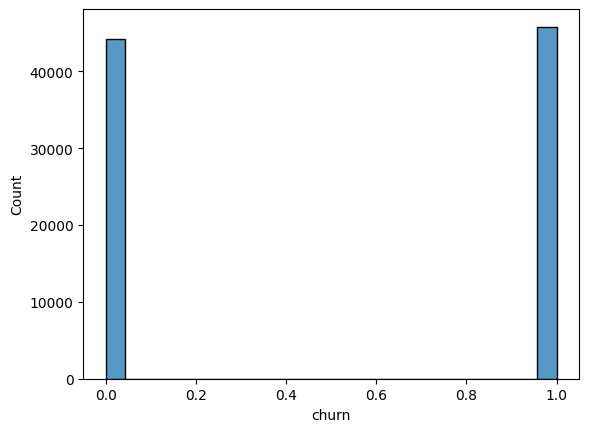

In [9]:
sns.histplot(data=df, x=target)
plt.show()

## Analisis Univariable

In [10]:
pd.set_option('display.max_rows', None)
display(df_3)

,Variable,Description
0,rev,Mean monthly revenue (charge amount)
1,mou,Mean number of monthly minutes of use
2,totmrc,Mean total monthly recurring charge
3,da,Mean number of directory assisted calls
4,ovrmou,Mean overage minutes of use
5,ovrrev,Mean overage revenue
6,vceovr,Mean revenue of voice overage
7,datovr,Mean revenue of data overage
8,roam,Mean number of roaming calls
9,change_mou,Percentage change in monthly minutes of use v...


In [11]:
variables_eliminar = ['crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new', 'hnd_webcap', "ethnic", "marital", "truck", ]
df = df.drop(columns=variables_eliminar)
df_predecir = df_predecir.drop(columns=variables_eliminar)

* Distribucion de cada variable

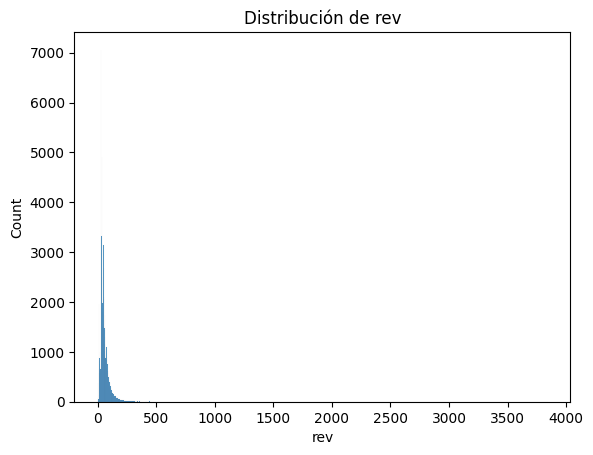

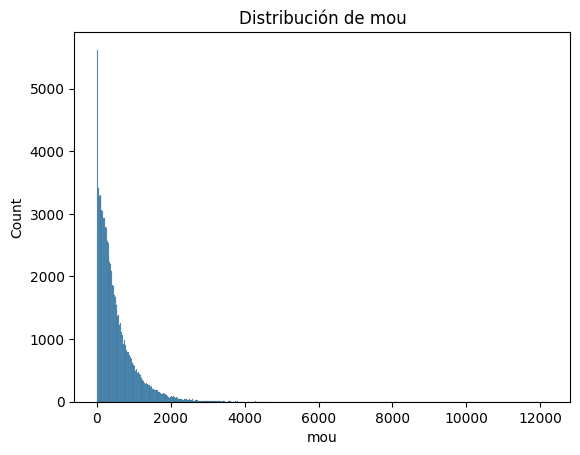

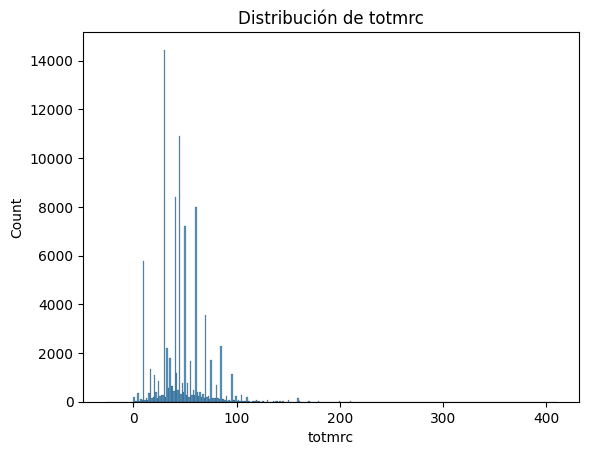

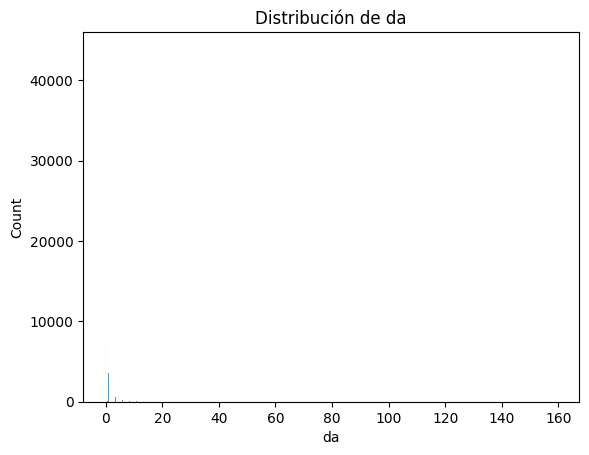

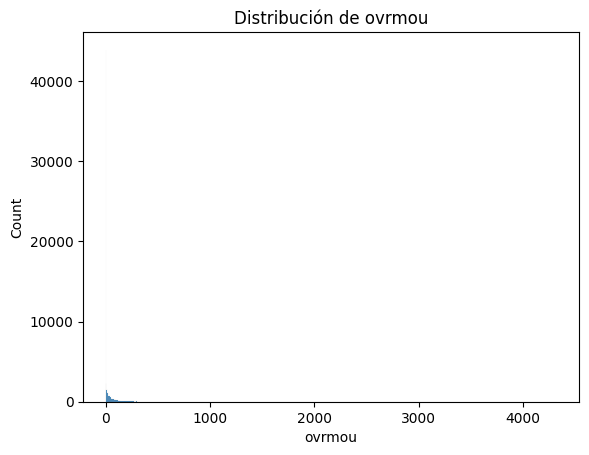

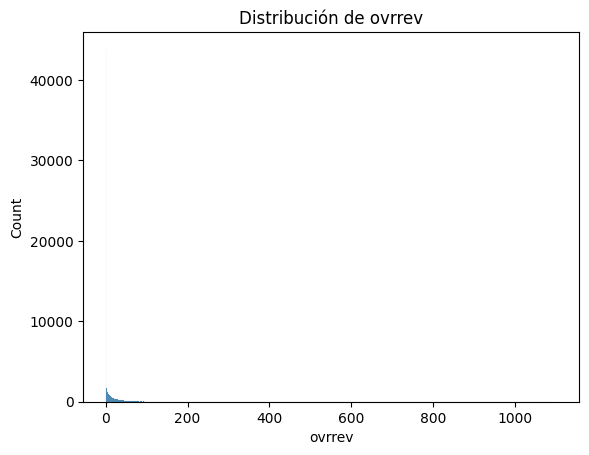

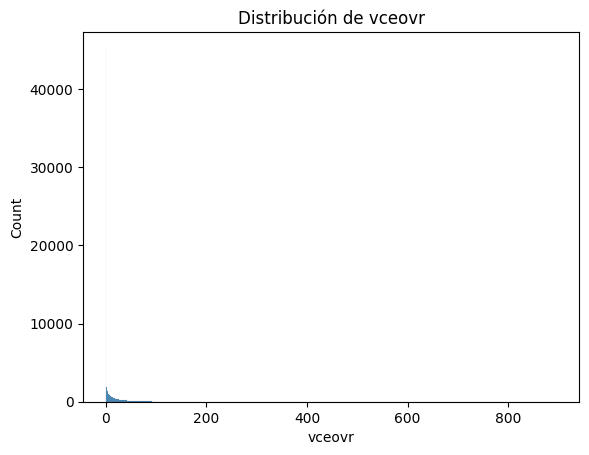

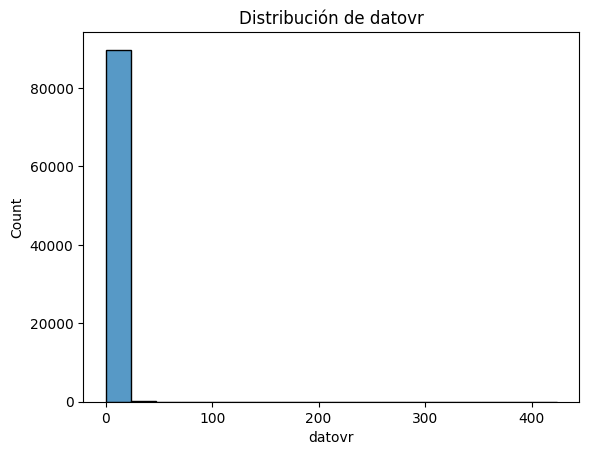

KeyboardInterrupt: 

In [12]:
for col in df.columns:
    if df[col].dtype == 'object':  # Si la variable es categórica
        sns.countplot(data=df, x=col)
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
        plt.show()
    else:  # Si la variable es numérica
        sns.histplot(data=df, x=col)
        plt.title(f'Distribución de {col}')
        plt.show()

## Analisis Variable-Target

* Relacion target-variable

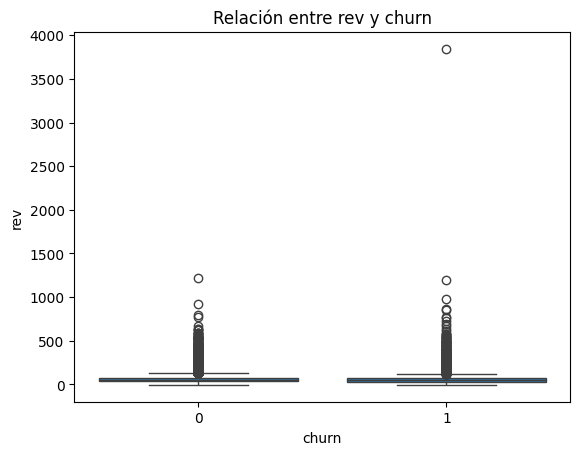

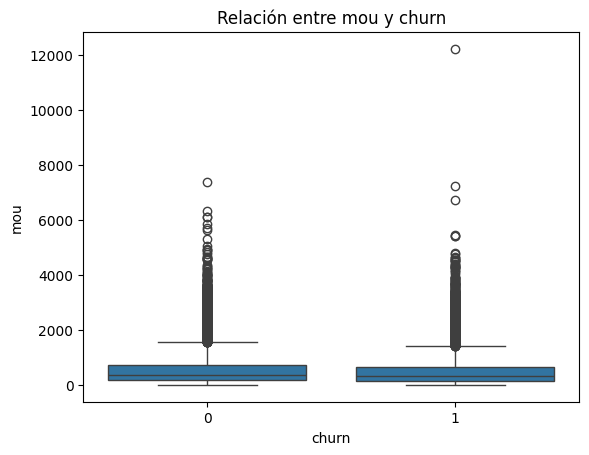

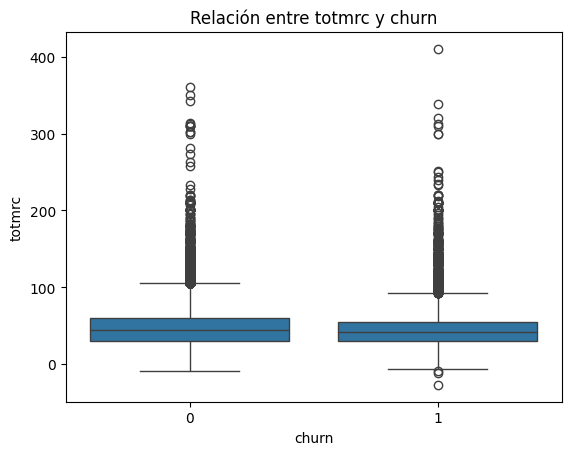

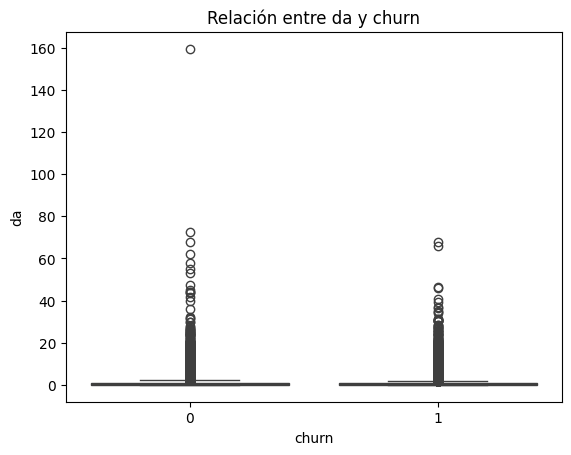

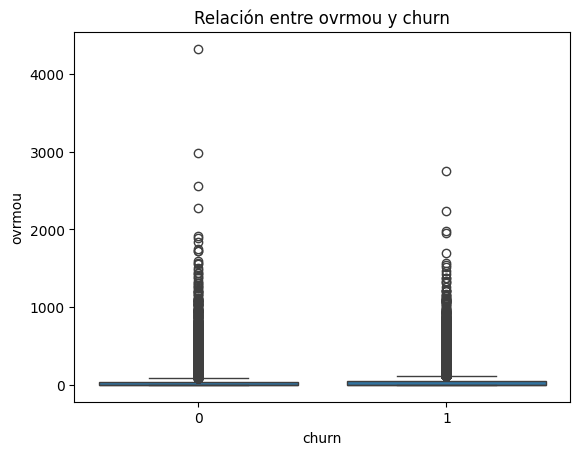

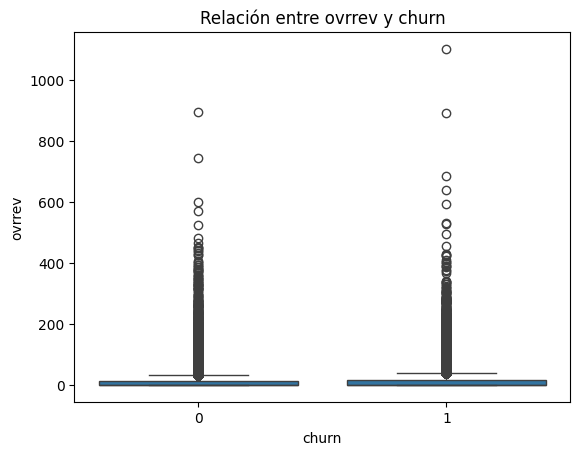

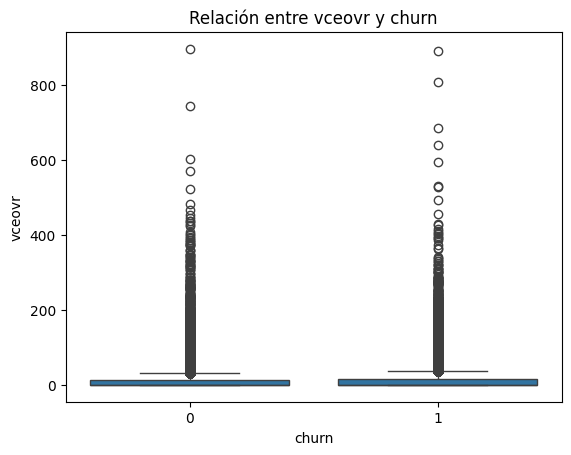

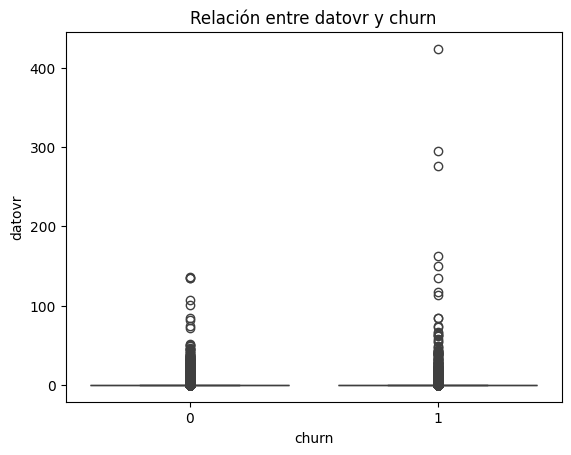

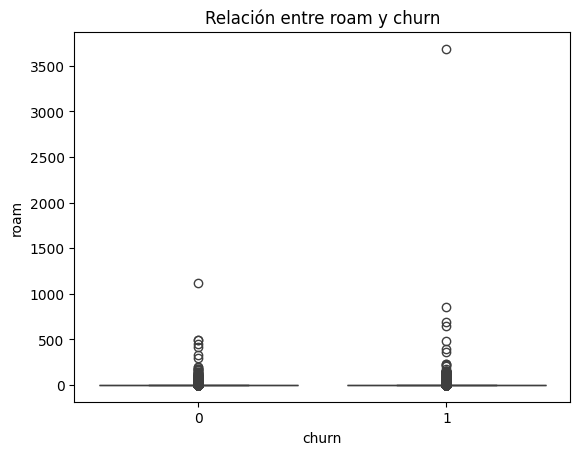

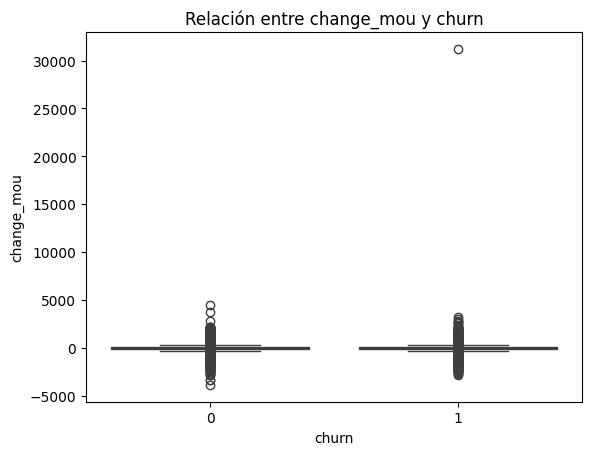

KeyboardInterrupt: 

In [13]:
for col in df.columns:
    if col != 'churn':  # Excluir la propia variable objetivo
        if df[col].dtype == 'object':  # Si la variable es categórica
            sns.countplot(data=df, x=col, hue='churn')
            plt.title(f'Relación entre {col} y churn')
            plt.xticks(rotation=45, ha='right')
            plt.show()
        else:  # Si la variable es numérica
            sns.boxplot(data=df, x='churn', y=col)
            plt.title(f'Relación entre {col} y churn')
            plt.show()

In [14]:
for col in df.columns:
    if col != 'churn' and df[col].dtype == 'object':  # Solo para variables categóricas
        # Agrupar por la variable categórica y 'churn', contar las observaciones y calcular los porcentajes
        tabla_porcentajes = pd.crosstab(df[col], df['churn'], normalize='index') * 100

        # Renombrar las columnas para mayor claridad
        tabla_porcentajes = tabla_porcentajes.rename(columns={0: 'No Churn (%)', 1: 'Churn (%)'})

        # Imprimir la tabla
        print(f'\nPorcentajes de Churn para {col}:\n{tabla_porcentajes}')


Porcentajes de Churn para new_cell:
churn     No Churn (%)  Churn (%)
new_cell                         
N            49.755239  50.244761
U            48.728151  51.271849
Y            49.889588  50.110412

Porcentajes de Churn para dualband:
churn     No Churn (%)  Churn (%)
dualband                         
N            44.808502  55.191498
T            55.640199  44.359801
U            64.921466  35.078534
Y            50.058354  49.941646

Porcentajes de Churn para ownrent:
churn    No Churn (%)  Churn (%)
ownrent                         
O           50.152395  49.847605
R           47.078652  52.921348

Porcentajes de Churn para dwlltype:
churn     No Churn (%)  Churn (%)
dwlltype                         
M            48.580081  51.419919
S            50.540195  49.459805

Porcentajes de Churn para infobase:
churn     No Churn (%)  Churn (%)
infobase                         
M            49.871808  50.128192

Porcentajes de Churn para HHstatin:
churn     No Churn (%)  Churn (%)
H

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [15]:
df[df[target].isnull()]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,dualband,hnd_price,phones,models,rv,ownrent,lor,dwlltype,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID


In [16]:
len(df)

90000

In [17]:
df = df.drop_duplicates()
df_predecir = df_predecir.drop_duplicates()

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [18]:
df.isnull().sum()

,0
rev,134
mou,134
totmrc,134
da,134
ovrmou,134
ovrrev,134
vceovr,134
datovr,134
roam,134
change_mou,595


In [19]:
df.isnull().sum().sum()

274900

In [20]:
df_nulos = df.isnull().sum().div(len(df)).to_frame().reset_index()
df_nulos.columns = ['var', 'nulos']

In [21]:
df_nulos = df_nulos.sort_values('nulos', ascending=False)

In [22]:
df_nulos

,var,nulos
79,numbcars,0.484089
81,dwllsize,0.375156
80,HHstatin,0.367022
73,ownrent,0.327678
75,dwlltype,0.310867
74,lor,0.294467
78,income,0.246622
76,adults,0.222589
77,infobase,0.215589
72,rv,0.016122


In [23]:
df_nulos[df_nulos['nulos']>0.15]

,var,nulos
79,numbcars,0.484089
81,dwllsize,0.375156
80,HHstatin,0.367022
73,ownrent,0.327678
75,dwlltype,0.310867
74,lor,0.294467
78,income,0.246622
76,adults,0.222589
77,infobase,0.215589


In [24]:
df['numbcars'] = df['numbcars'].fillna(0)

In [25]:
df['infobase'].unique()

array(['M', nan], dtype=object)

In [26]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_numericas

['rev',
 'mou',
 'totmrc',
 'da',
 'ovrmou',
 'ovrrev',
 'vceovr',
 'datovr',
 'roam',
 'change_mou',
 'change_rev',
 'drop_vce',
 'drop_dat',
 'blck_vce',
 'blck_dat',
 'unan_vce',
 'unan_dat',
 'plcd_vce',
 'plcd_dat',
 'recv_vce',
 'recv_sms',
 'comp_vce',
 'comp_dat',
 'custcare',
 'ccrndmou',
 'cc_mou',
 'inonemin',
 'threeway',
 'mou_cvce',
 'mou_cdat',
 'mou_rvce',
 'owylis_vce',
 'mouowylisv',
 'iwylis_vce',
 'mouiwylisv',
 'peak_vce',
 'peak_dat',
 'mou_peav',
 'mou_pead',
 'opk_vce',
 'opk_dat',
 'mou_opkv',
 'mou_opkd',
 'drop_blk',
 'attempt',
 'complete',
 'callfwdv',
 'callwait',
 'churn',
 'months',
 'uniqsubs',
 'actvsubs',
 'totcalls',
 'totmou',
 'totrev',
 'adjrev',
 'adjmou',
 'adjqty',
 'avgrev',
 'avgmou',
 'avgqty',
 'avg3mou',
 'avg3qty',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'avg6rev',
 'hnd_price',
 'phones',
 'models',
 'rv',
 'lor',
 'adults',
 'income',
 'numbcars',
 'forgntvl',
 'eqpdays',
 'Customer_ID']

In [27]:
for col in columnas_numericas:
  df[col] = df[col].fillna(df[col].mean())

In [28]:
columnas_objeto = df.select_dtypes(include=['object']).columns.tolist()
columnas_objeto

['new_cell',
 'dualband',
 'ownrent',
 'dwlltype',
 'infobase',
 'HHstatin',
 'dwllsize',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [29]:
list(df['kid6_10'].mode())[0]

'U'

In [30]:
for col in columnas_objeto:
  df[col] = df[col].fillna(list(df[col].mode())[0])

In [31]:
df.isnull().sum()

,0
rev,0
mou,0
totmrc,0
da,0
ovrmou,0
ovrrev,0
vceovr,0
datovr,0
roam,0
change_mou,0


In [32]:
df.isnull().sum().sum()

0

In [33]:
df['kid11_15'].isnull().sum()

0

In [34]:
df['kid6_10'].unique()

array(['U', 'Y'], dtype=object)

# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [35]:
for col in columnas_objeto:
  print(col)
  print(df[col].unique())
  print(40*'-')

new_cell
['U' 'N' 'Y']
----------------------------------------
dualband
['Y' 'N' 'T' 'U']
----------------------------------------
ownrent
['O' 'R']
----------------------------------------
dwlltype
['S' 'M']
----------------------------------------
infobase
['M']
----------------------------------------
HHstatin
['C' 'I' 'B' 'A' 'G' 'H']
----------------------------------------
dwllsize
['A' 'D' 'O' 'E' 'J' 'C' 'B' 'I' 'N' 'K' 'L' 'G' 'H' 'M' 'F']
----------------------------------------
kid0_2
['U' 'Y']
----------------------------------------
kid3_5
['U' 'Y']
----------------------------------------
kid6_10
['U' 'Y']
----------------------------------------
kid11_15
['U' 'Y']
----------------------------------------
kid16_17
['U' 'Y']
----------------------------------------
creditcd
['Y' 'N']
----------------------------------------


In [36]:
dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15
}

df['dwllsize'] = df['dwllsize'].map(dict)

In [37]:
df['dwllsize'].unique()

array([ 1,  4, 15,  5, 10,  3,  2,  9, 14, 11, 12,  7,  8, 13,  6])

In [38]:
sorted(df['ethnic'].unique())

KeyError: 'ethnic'

In [ ]:
dict = {
 'B': 1,
 'D': 2,
 'F': 3,
 'G': 4,
 'H': 5,
 'I': 6,
 'J': 7,
 'M': 8,
 'N': 9,
 'O': 10,
 'P': 11,
 'R': 12,
 'S': 13,
 'U': 14,
 'X': 15,
 'Z': 16
}

df['ethnic'] = df['ethnic'].map(dict)

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [39]:
df_corr = df.corr(numeric_only=True)

In [43]:
df_corr[abs((df_corr>0.95)) & (df_corr < 1)].stack().reset_index()

,level_0,level_1,0
0,mou,avg3mou,0.981129
1,ovrmou,ovrrev,0.957401
2,ovrmou,vceovr,0.954806
3,ovrrev,ovrmou,0.957401
4,ovrrev,vceovr,0.994997
5,vceovr,ovrmou,0.954806
6,vceovr,ovrrev,0.994997
7,plcd_vce,comp_vce,0.985686
8,plcd_vce,attempt,0.998551
9,plcd_vce,complete,0.983671


In [46]:
df['churn'] = df['churn'].astype(float)

In [49]:


def highly_correlated(X, y, threshold):
    # Select only numeric features
    X_numeric = X.select_dtypes(include=np.number)

    col_corr = list()  # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X_numeric.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i])  # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1': colnames,
                      'F2': rownames,
                      'corr_F1_F2': col_corr,
                      # Calculate correlation with the original DataFrame (X_numeric) instead of the correlation matrix
                      'corr_F1_target': [np.abs(np.corrcoef(X_numeric[i], y)[0, 1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X_numeric[i], y)[0, 1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

# Assuming 'df' is your DataFrame and 'churn' is your target variable
df['churn'] = df['churn'].astype(float)  # Ensure 'churn' is numeric
highly_corr = highly_correlated(df, df['churn'], 0.95)
print(highly_corr)

          F1        F2  corr_F1_F2  corr_F1_target  corr_F2_target F_to_delete
0     ovrrev    ovrmou    0.957401        0.021369        0.016317      ovrmou
1     vceovr    ovrmou    0.954806        0.021572        0.016317      ovrmou
2     vceovr    ovrrev    0.994997        0.021572        0.021369      ovrrev
3   comp_vce  plcd_vce    0.985686        0.050651        0.047029    plcd_vce
4   comp_dat  plcd_dat    0.990591        0.007206        0.007389    comp_dat
5     cc_mou  ccrndmou    0.988749        0.032771        0.034388      cc_mou
6   inonemin  recv_vce    0.965997        0.033247        0.040898    inonemin
7   mou_opkd  mou_cdat    0.960178        0.008218        0.008764    mou_opkd
8    attempt  plcd_vce    0.998551        0.047133        0.047029    plcd_vce
9    attempt  comp_vce    0.984313        0.047133        0.050651     attempt
10  complete  plcd_vce    0.983671        0.050721        0.047029    plcd_vce
11  complete  comp_vce    0.997889        0.050721  

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [52]:


def remove_low_variance_features(df, threshold=0.01):
    """
    Removes features with low variance from a DataFrame.

    Args:
        df: The input DataFrame.
        threshold: The variance threshold. Features with variance below this
                   threshold will be removed. Defaults to 0.01 (1%).

    Returns:
        A new DataFrame with low-variance features removed.
    """

    # Calculate variance of each numeric feature
    variances = df.select_dtypes(include=np.number).var()

    # Select features with variance above the threshold
    features_to_keep = variances[variances > threshold].index.tolist()

    # Create a new DataFrame with selected features
    df_filtered = df[features_to_keep]

    return df_filtered

# Apply the function to your DataFrame
df = remove_low_variance_features(df, threshold=0.01)
df_predecir = remove_low_variance_features(df_predecir, threshold=0.01)



In [51]:
df

KeyboardInterrupt: 

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [53]:
# prompt: guardar data path de ambos df y df_predecir

# Guardar los DataFrames en archivos CSV
df.to_csv('/content/drive/MyDrive/Nuclio/2º entregable/df_clean.csv', index=False)
df_predecir.to_csv('/content/drive/MyDrive/Nuclio/2º entregable/df_predecir_clean.csv', index=False)

# Mostrar las primeras filas de los DataFrames para verificar
print("Primeras filas de df_clean:")
print(df.head())

print("\nPrimeras filas de df_predecir_clean:")
print(df_predecir.head())


Primeras filas de df_clean:
       rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  roam  \
0  23.9975  219.25  22.500  0.2475    0.00     0.0     0.0     0.0   0.0   
1  57.4925  482.75  37.425  0.2475   22.75     9.1     9.1     0.0   0.0   
2  16.9900   10.25  16.990  0.0000    0.00     0.0     0.0     0.0   0.0   
3  38.0000    7.50  38.000  0.0000    0.00     0.0     0.0     0.0   0.0   
4  55.2300  570.50  71.980  0.0000    0.00     0.0     0.0     0.0   0.0   

   change_mou  change_rev  drop_vce  drop_dat  blck_vce  blck_dat   unan_vce  \
0     -157.25    -18.9975  0.666667       0.0  0.666667       0.0   6.333333   
1      532.25     50.9875  8.333333       0.0  1.000000       0.0  61.333333   
2       -4.25      0.0000  0.333333       0.0  0.000000       0.0   2.666667   
3       -1.50      0.0000  0.000000       0.0  0.000000       0.0   0.000000   
4       38.50      0.0000  9.666667       0.0  0.666667       0.0  77.000000   

   unan_dat    plcd_vce  plcd_dat 